In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pywt

In [9]:
def load_emg_data(file_path):
    data = pd.read_csv(file_path, sep='\t', comment='#', header=None)
    return data.iloc[:, 5].values

In [10]:
def low_pass_filter(signal, cutoff_freq, fs):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(10, normal_cutoff, btype='low', analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

In [11]:
def wavelet_denoising(signal, wavelet='db4', level=5):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    denoised_coeffs = [pywt.threshold(c, value=uthresh, mode='soft') for c in coeffs]
    denoised_signal = pywt.waverec(denoised_coeffs, wavelet)
    return denoised_signal

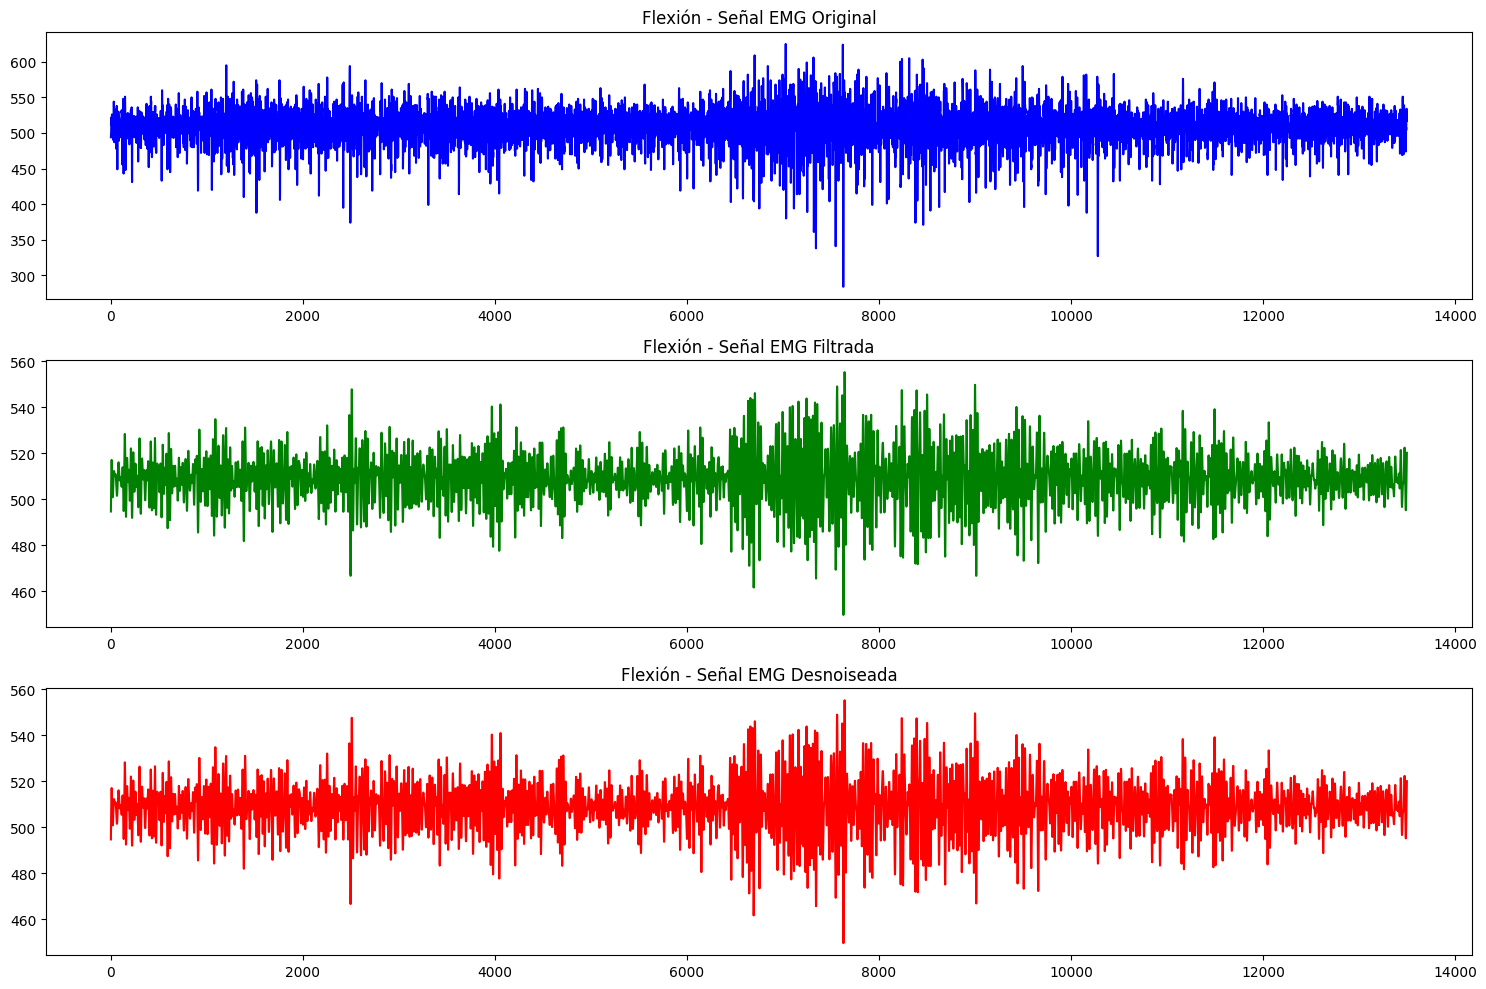

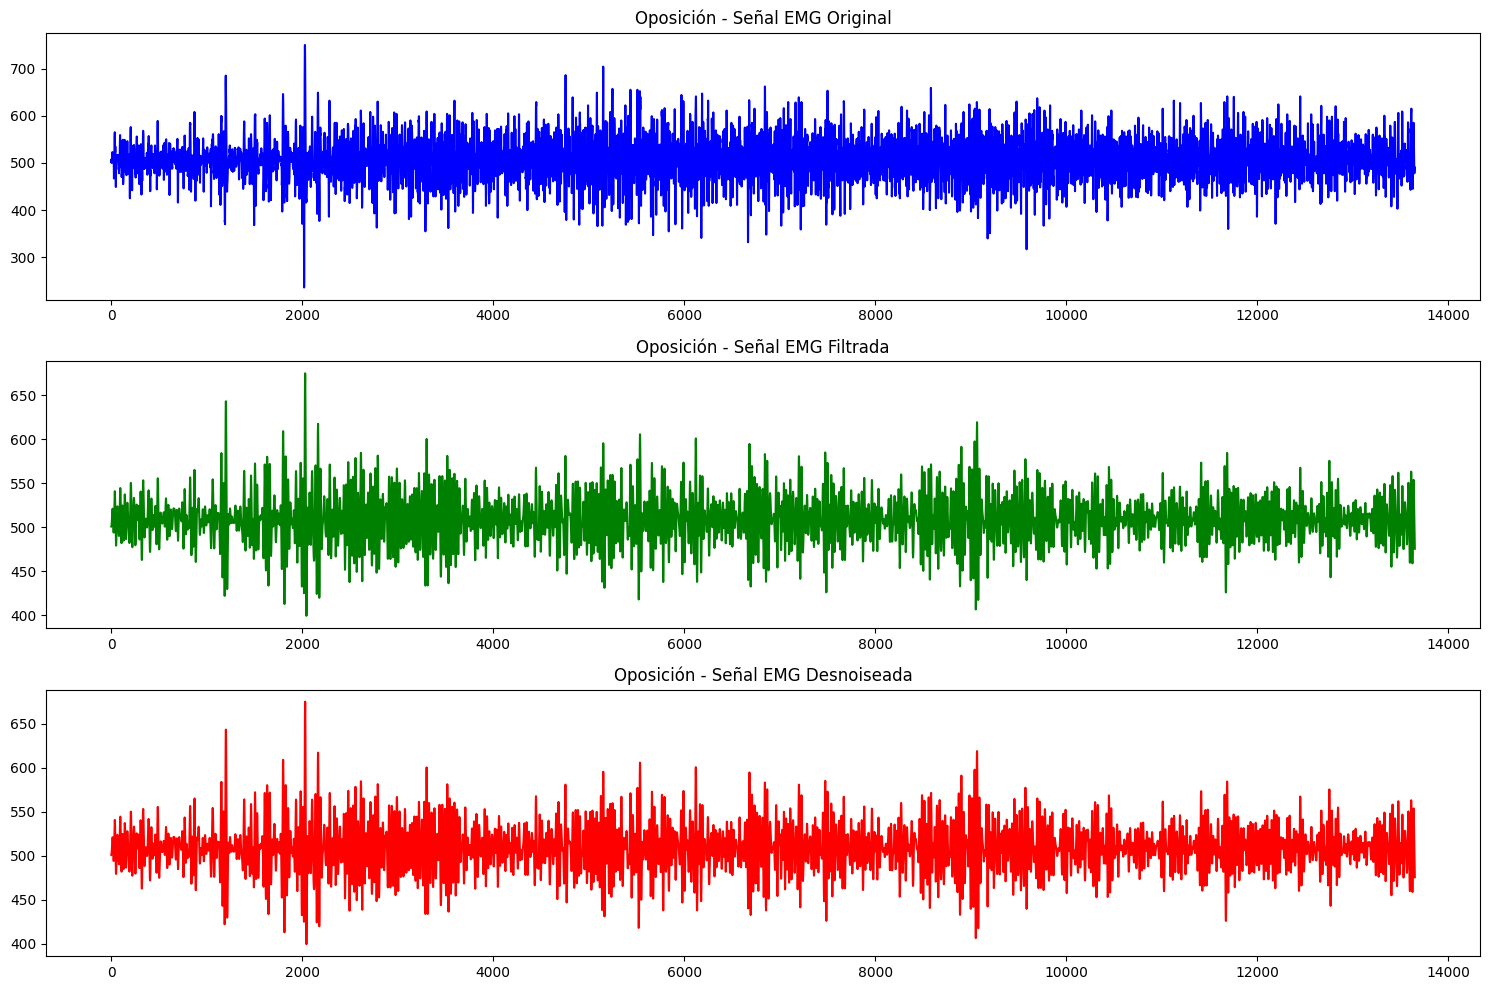

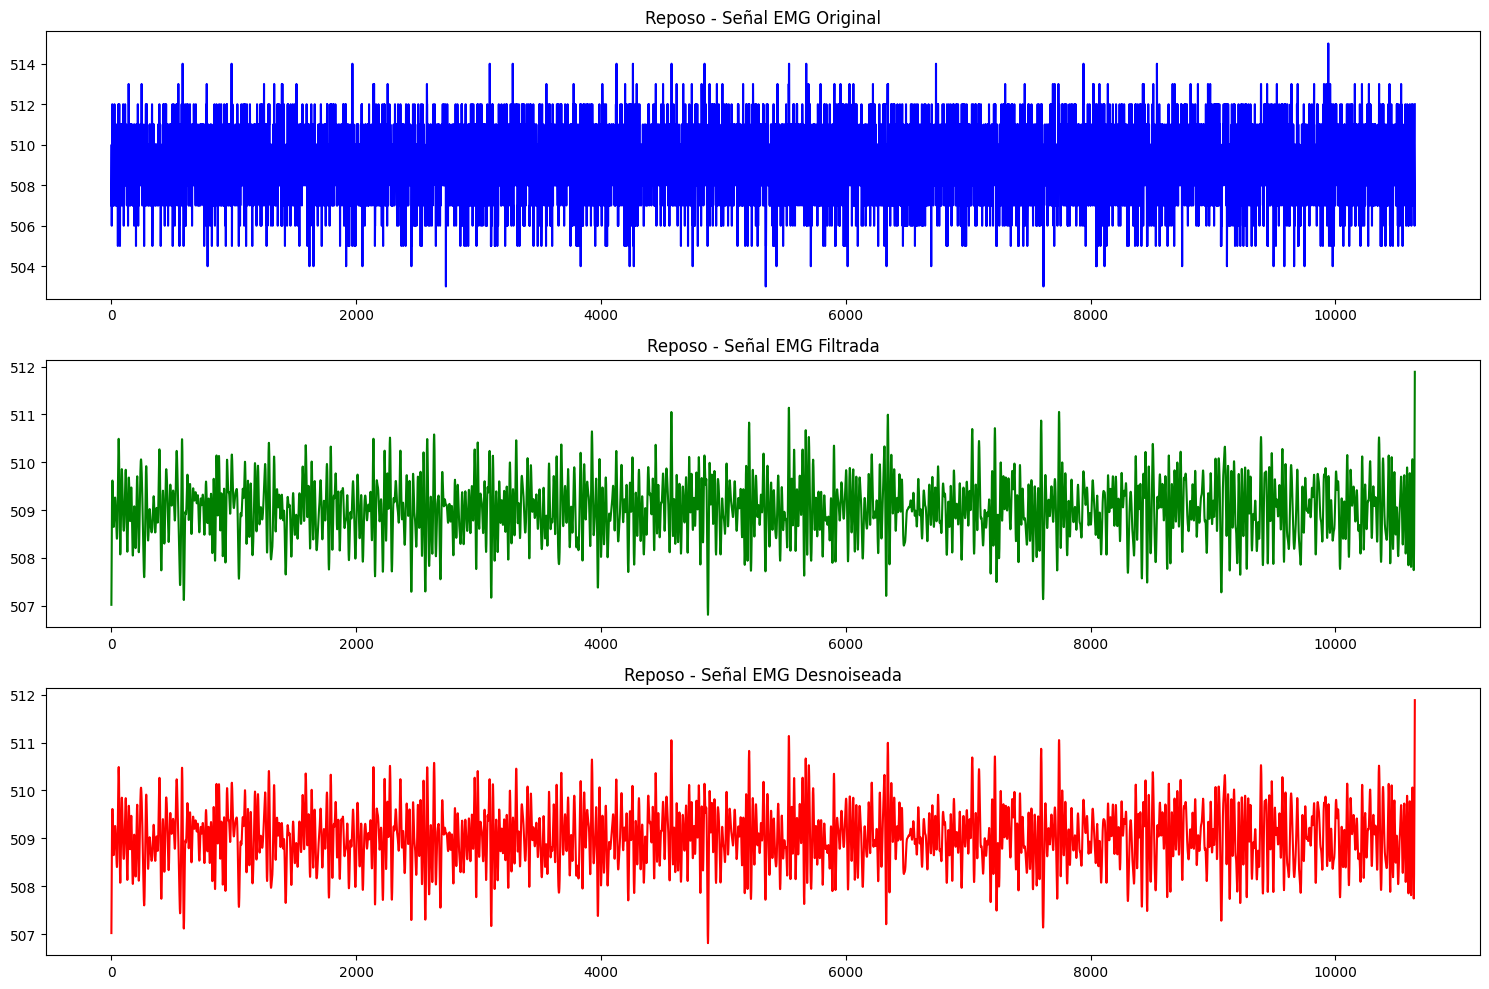

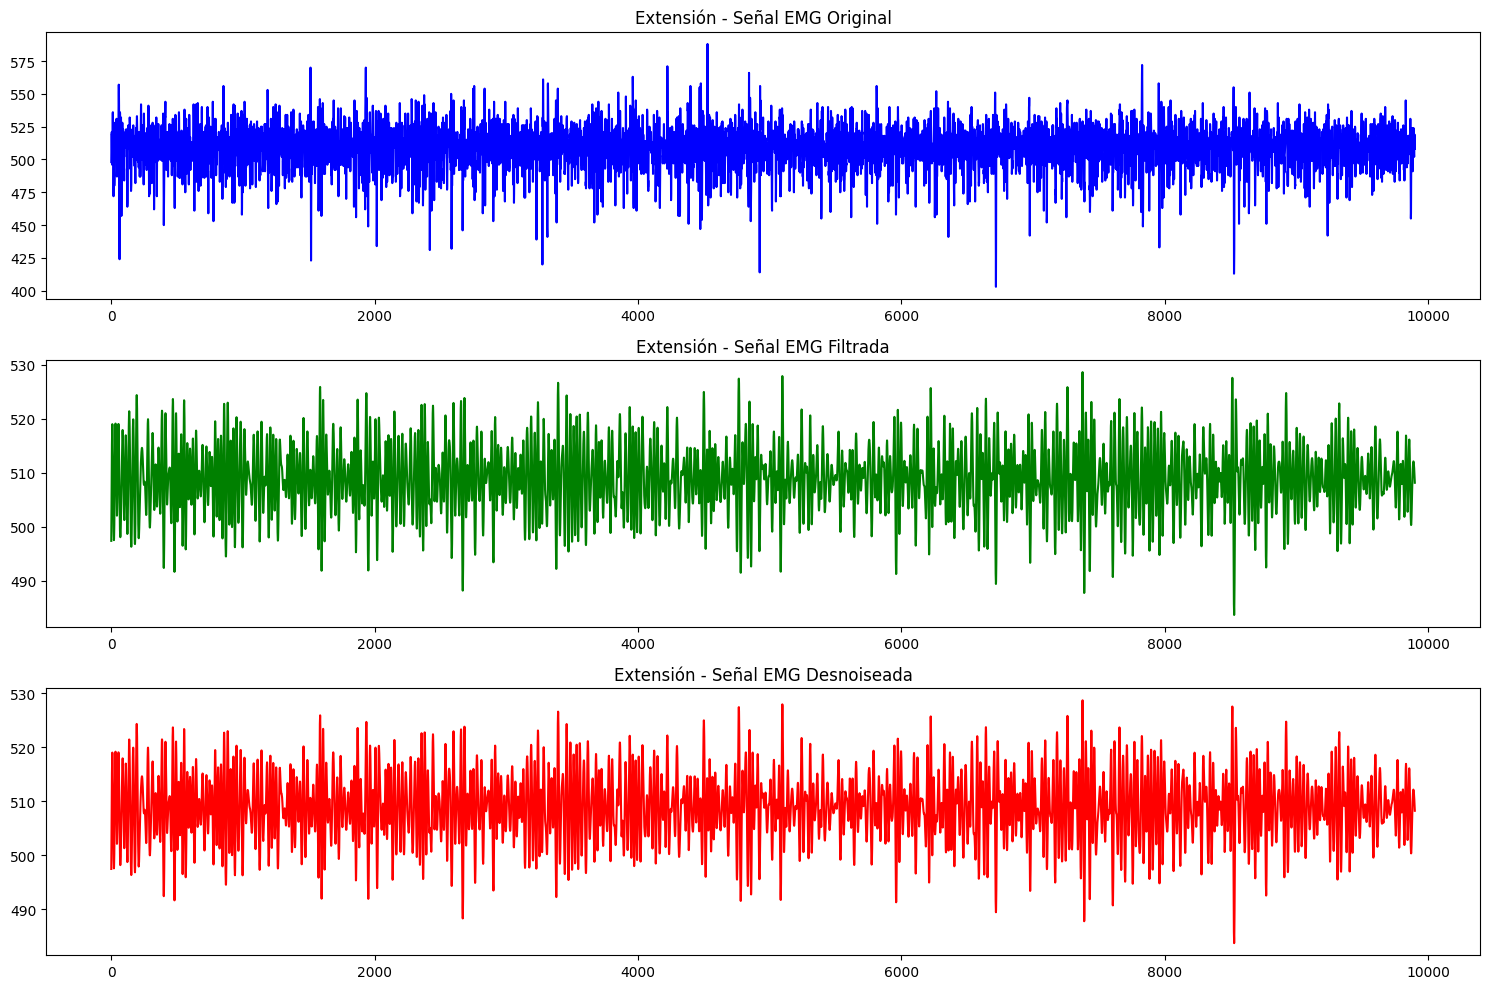

In [24]:
def process_and_visualize(file_path, title, wavelet='db4', level=5, cutoff_freq=50, fs=1000, colors=('b', 'g', 'r')):
    signal = load_emg_data(file_path)
    filtered_signal = low_pass_filter(signal, cutoff_freq, fs)
    denoised_signal = wavelet_denoising(filtered_signal, wavelet, level)

    fig, axs = plt.subplots(3, 1, figsize=(15, 10))

    axs[0].plot(signal, color=colors[0])
    axs[0].set_title(f'{title} - Señal EMG Original')
    axs[1].plot(filtered_signal, color=colors[1])
    axs[1].set_title(f'{title} - Señal EMG Filtrada')
    axs[2].plot(denoised_signal, color=colors[2])
    axs[2].set_title(f'{title} - Señal EMG Desnoiseada')

    plt.tight_layout()
    plt.show()
    
file_info = [
    ('C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Flexion1.txt', 'Flexión'),
    ('C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Oposicion.txt', 'Oposición'),
    ('C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Reposo.txt', 'Reposo'),
    ('C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Extension.txt', 'Extensión')
]

for file_path, title in file_info:
    process_and_visualize(file_path, title, colors=('b', 'g', 'r')) 